### Import packages

In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import math
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import pylab as py



In [2]:
## We will assume we bought 100 shares 5 years ago


In [3]:
# JPM_5yrs = yf.download(tickers = 'JPM', period='5y', interval = "1d")

# JPM_5yrs

In [4]:
start = datetime.date(2016, 1, 29)
end = datetime.date(2021, 1, 2)
# start = datetime.date.today()-datetime.timedelta(365*10)
# end = datetime.date.today()
prices = web.DataReader(["JPM", "BTC-USD"], "yahoo", start, end)["Adj Close"]
prices = prices.rename(columns={"BTC-USD": "BTC"})
prices = prices.dropna()
returns = prices.pct_change()

In [5]:
# observe data
returns.head()

Symbols,JPM,BTC
Date,,
2016-01-29,NaN,NaN
2016-02-01,-0.010756,-0.016913
2016-02-02,-0.031090,0.003731
2016-02-03,0.006663,-0.012015
2016-02-04,0.017244,0.053102


###  Determine Initial Investment

In [6]:
# Determine weights
initialJPM = prices.JPM[0] * 100
initialBTC = prices.BTC[0] * 5
initialInvestment = initialJPM + initialBTC
initialInvestment

6818.367614746094

In [7]:
weightJPM = initialJPM / (initialBTC + initialJPM)
weightBTC = 1 - weightJPM
print(
    "This would make the weights %.3f and %.3f for JPM and BTC respectively"
    % (weightJPM, weightBTC)
)

This would make the weights 0.722 and 0.278 for JPM and BTC respectively


### Calculate Portfolio Daily Returns


In [8]:
returns["Portfolio"] = (returns.JPM * weightJPM) + (returns.BTC * weightBTC)
returns = returns + 1
returns.head()


Symbols,JPM,BTC,Portfolio
Date,,,
2016-01-29,NaN,NaN,NaN
2016-02-01,0.989244,0.983087,0.987530
2016-02-02,0.968910,1.003731,0.978600
2016-02-03,1.006663,0.987985,1.001466
2016-02-04,1.017244,1.053102,1.027223


In [9]:
# AVG=returns['JPM'].mean()*weightJPM+(returns['BTC'].mean()*weightBTC)
# AVG

In [10]:
Average_portfolio_returns=returns['Portfolio'].mean()
Average_portfolio_returns

1.0019279133890788

In [11]:
portfolio_returns=returns["Portfolio"]

## Set our starting position of $10,000

In [12]:
returns.iloc[0] = 10000
returns.head()

Symbols,JPM,BTC,Portfolio
Date,,,
2016-01-29,10000.000000,10000.000000,10000.000000
2016-02-01,0.989244,0.983087,0.987530
2016-02-02,0.968910,1.003731,0.978600
2016-02-03,1.006663,0.987985,1.001466
2016-02-04,1.017244,1.053102,1.027223


In [13]:
returns.cumprod().tail()

Symbols,JPM,BTC,Portfolio
Date,,,
2020-12-24,23928.678072,625496.062440,79036.920608
2020-12-28,24086.255145,713746.097584,82515.637724
2020-12-29,24022.841683,721062.248544,82594.214363
2020-12-30,24090.098526,760024.486506,84003.022405
2020-12-31,24418.705281,764261.076589,84960.325803


In [14]:
portValues = returns.cumprod()
portValues["Date"] = portValues.index

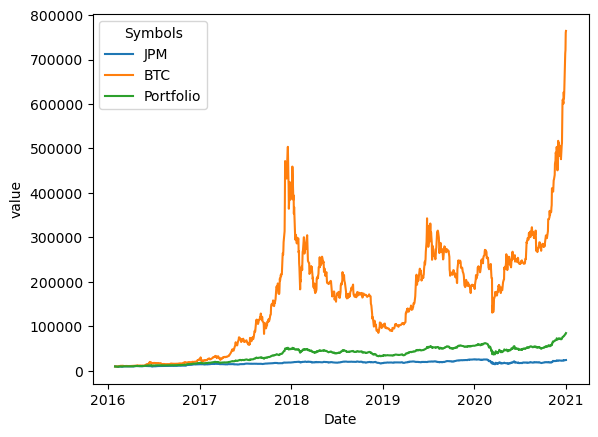

In [15]:
sns.lineplot(x="Date", y="value", hue="Symbols", data=portValues.melt(id_vars=["Date"]));

###  Calculating Portfolio Correlation Coefficients


In [16]:
prices.pct_change().corr()

Symbols,JPM,BTC
Symbols,,
JPM,1.000000,0.116031
BTC,0.116031,1.000000


###  Calculating Portfolio Variance

$$ {Portfolio variance} = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2Cov_{1,2} $$
Where:

$$ w_1 $$ = the portfolio weight of the first asset

$$ w_2 $$ = the portfolio weight of the second asset

$$ \sigma_1 $$ = the standard deviation of the first asset

$$ \sigma_2 $$ = the standard deviation of the second asset


In [17]:
## Defining variables
##will use the weights given above
weights = np.array([weightJPM,weightBTC])
individual_returns = prices.pct_change()
covariance = 252 * individual_returns.cov()
print(weights)
covariance

[0.72172665 0.27827335]


Symbols,JPM,BTC
Symbols,,
JPM,0.092928,0.026037
BTC,0.026037,0.541864


$$ Portfolio Variance = Weights transposed * (covariance matrix) * weights $$


In [18]:
variance = np.dot(weights.T, np.dot(covariance, weights))

# Print the result
print(str(np.round(variance, 4) * 100) + "%")

10.08%


In [19]:
#returns.var() * 252
print(str(np.round(returns.var() * 252, 4) * 100) + "%")

Symbols
JPM          2.030214e+09
BTC          2.030213e+09
Portfolio    2.030214e+09
dtype: float64%


In [20]:
SD=np.round(math.sqrt(variance) * 100, 2)
SD

31.75

## Sharpe Ratio of Portfolio


$\cfrac{Portfolio_{Return} - \textrm{risk-free rate}}{Portfolio_{StandardDev}}$


In [21]:
## Since interest rates have been near 0 for a while now, we will assume 0 for the risk-free rate. Our formula is now: 


$\cfrac{\textrm{Portfolio}_{Return}}{\textrm{Portfolio}_{StandardDev}}$


In [22]:
#lets use average portfolio return
sharp_ratio=Average_portfolio_returns/SD
sharp_ratio

0.031556784673671776

### Beta

In [23]:
BTC_market_covarriance=covariance.iloc[1,1]
JPM_market_covarriance=covariance.iloc[0,0]

print(BTC_market_covarriance,JPM_market_covarriance)
#Average_market_covariance=(BTC_market_covarriance+JPM_market_covarriance)/2
#print(Average_market_covariance)
market_variance=variance
print(market_variance)
portfolio_beta=JPM_market_covarriance/market_variance
print(portfolio_beta)

0.5418639765667537 0.09292769574446957
0.1008233080015997
0.9216886212758972


## Jensen’s alpha

$ Jensen's alpha = Portfolio return - [Risk Free Rate + Portfolio Beta * (Market Return - Risk Free Rate)] $

In [24]:
#assuming risk free rate is zero
jensen=Average_portfolio_returns-beta_m*
jensen

0.07846235627966214

### Treynor measure

$\cfrac{Portfolio_{Return} - \textrm{risk-free rate}}{Portfolio_{Beta}}$


In [25]:
# Assuming risk free rate is zero
treynor_measure=Average_portfolio_returns/portfolio_beta
treynor_measure

1.08705683271006

### Homoskedasticity

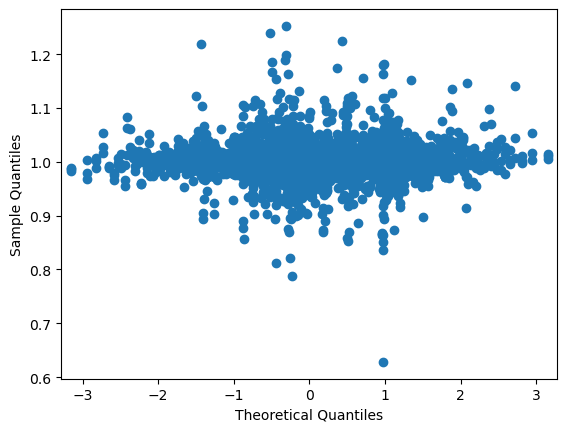

In [26]:
#Drop first row and plot
# QQ Plot
sm.qqplot(returns.iloc[1:])
py.show()

### Checking Linear Relationship Assumption

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Returns Distribution')

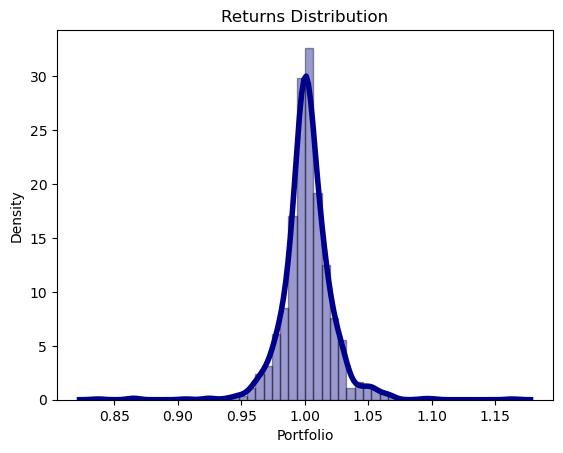

In [27]:
# Density Plot and Histogram
#Drop first row and plot

sns.distplot(returns['Portfolio'].iloc[1:], hist=True, kde=True, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Returns Distribution')

### Section 2. Finding the Average portfolio returns for 2021 Year

In [28]:
start = datetime.date(2020, 12, 31)
end = datetime.date(2022, 1, 1)
# start = datetime.date.today()-datetime.timedelta(365*10)
# end = datetime.date.today()
prices = web.DataReader(["JPM", "BTC-USD"], "yahoo", start, end)["Adj Close"]
prices = prices.rename(columns={"BTC-USD": "BTC"})
prices = prices.dropna()
returns = prices.pct_change()

In [29]:
# Determine weights
initialJPM = prices.JPM[0] * 100
initialBTC = prices.BTC[0] * 5
initialInvestment = initialJPM + initialBTC
initialInvestment

157025.04257202148

In [30]:
weightJPM = initialJPM / (initialBTC + initialJPM)
weightBTC = 1 - weightJPM
print(
    "This would make the weights %.3f and %.3f for JPM and BTC respectively"
    % (weightJPM, weightBTC)
)

This would make the weights 0.077 and 0.923 for JPM and BTC respectively


In [31]:
returns["Portfolio"] = (returns.JPM * weightJPM) + (returns.BTC * weightBTC)
returns = returns + 1
returns.head()


Symbols,JPM,BTC,Portfolio
Date,,,
2020-12-31,NaN,NaN,NaN
2021-01-04,0.990556,1.102414,1.093854
2021-01-05,1.005441,1.063197,1.058777
2021-01-06,1.046956,1.083311,1.080529
2021-01-07,1.032839,1.069157,1.066378


In [32]:
Average_portfolio_returns_yr_2021=returns['Portfolio'].mean()
Average_portfolio_returns_yr_2021

1.0029235858140955